In [1]:
# General Utilites
import os
import numpy as np
import pandas as pd
import random
import yaml
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [20, 20]
from PIL import Image
from shutil import copyfile
import shutil
from IPython.display import clear_output


In [2]:
with open("blind_scoring_from_directory.yaml", "r") as input_stream: 
    settings = yaml.load(input_stream, Loader=yaml.FullLoader)
image_dir = f'{settings["image_dir"]}'
output_dir = f'{settings["output_dir"]}'
log_path = f'{settings["log_path"]}'

input_stream.close()
status_list = ["Reproductive", "Flowering", "Fruiting", "Budding"]

scoring_df = pd.read_csv(log_path)
print(len(scoring_df))
scoring_df.head(10)

679


,Unnamed: 0,Filename,Filepath,Reproductive Status,Flowering Status,Fruiting Status,Budding Status,Scored
0,0,CONN00118770.jpg,/gpfs/project/dollar/ajj38/shared/outliers/CON...,NaN,NaN,NaN,NaN,False
1,1,NHA-659466.jpg,/gpfs/project/dollar/ajj38/shared/outliers/NHA...,NaN,NaN,NaN,NaN,False
2,2,barcode-00525812.jpg,/gpfs/project/dollar/ajj38/shared/outliers/bar...,NaN,NaN,NaN,NaN,False
3,3,KIRI-04831.jpg,/gpfs/project/dollar/ajj38/shared/outliers/KIR...,NaN,NaN,NaN,NaN,False
4,4,barcode-00617175.jpg,/gpfs/project/dollar/ajj38/shared/outliers/bar...,NaN,NaN,NaN,NaN,False
5,5,NHA-551578.jpg,/gpfs/project/dollar/ajj38/shared/outliers/NHA...,NaN,NaN,NaN,NaN,False
6,6,barcode-00687644.jpg,/gpfs/project/dollar/ajj38/shared/outliers/bar...,NaN,NaN,NaN,NaN,False
7,7,CONN00174053.jpg,/gpfs/project/dollar/ajj38/shared/outliers/CON...,NaN,NaN,NaN,NaN,False
8,8,1910130.jpg,/gpfs/project/dollar/ajj38/shared/outliers/191...,NaN,NaN,NaN,NaN,False
9,9,barcode-01040685.jpg,/gpfs/project/dollar/ajj38/shared/outliers/bar...,NaN,NaN,NaN,NaN,False


number of images scored: 0
/gpfs/project/dollar/ajj38/shared/outliers/CONN00118770.jpg


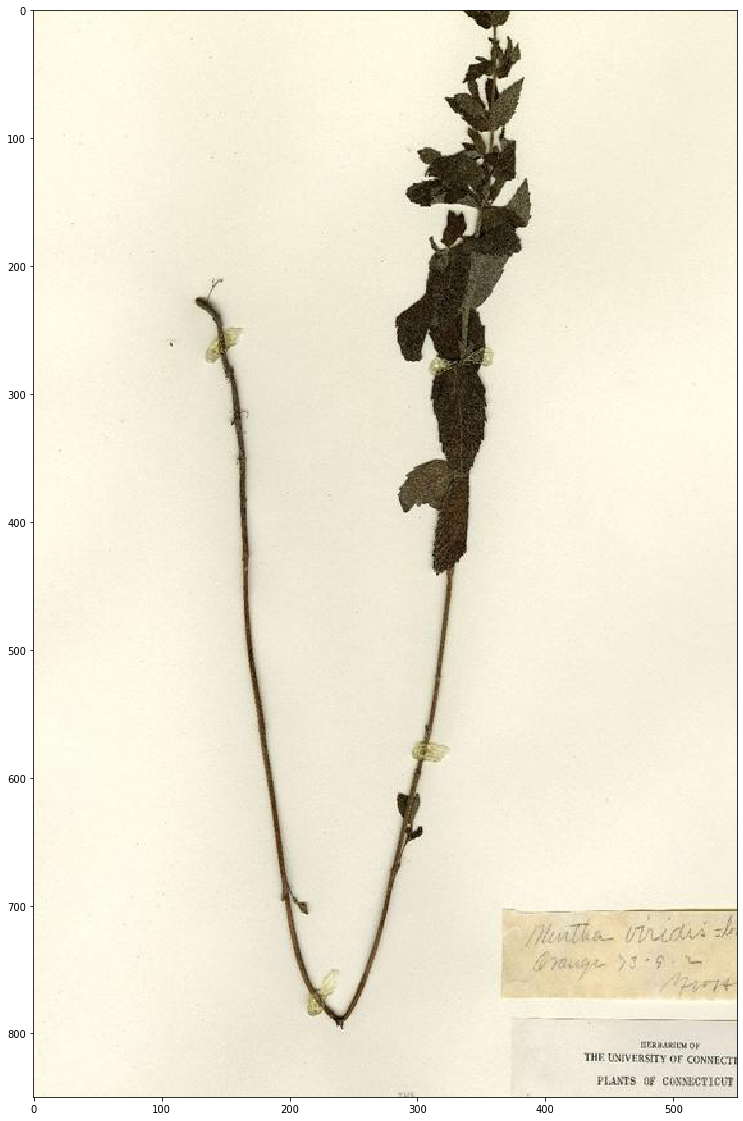

<Figure size 640x480 with 0 Axes>

In [ ]:
for index, row in scoring_df.iterrows():
    # to resume at where you left off
    if scoring_df.loc[index, "Scored"]:
        continue
    if index > int(settings["num_images"])-1:
        print("Finished {settings['num_images']} images! Thank you!")
        break
    clear_output(wait=True)
    print(f"number of images scored: {index}")
    filename = row['Filepath']
    print(filename)
    im = mpimg.imread(filename)
    plt.imshow(im)
    plt.figure(figsize=(8,6), dpi=80)
    plt.show()
    
    for status in status_list:
        while True:
            try: 
                answer = int(input("Does the image have leaves? Enter 1 if yes, 2 if no"))
                if  answer ==1:
                    answer = True
                elif answer == 2:
                    answer = False
                else: 
                    raise ValueError
                break
            except ValueError:
                print("Input was not 1 or 2, try again...")
        scoring_df.loc[index, f"{status} Status"] = answer
    scoring_df.loc[index, "Scored"] = True
    scoring_df.to_csv(log_path)

    